<a href="https://colab.research.google.com/github/rajivsam/cmi_count_data_modeling/blob/asif_ikbal_26_07_2021/notebooks/week_2_tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Loading the customers_per_hour data
data= pd.read_csv('https://raw.githubusercontent.com/rajivsam/cmi_count_data_modeling/asif_ikbal_26_07_2021/customers_per_hour.csv')

Data description- https://github.com/rajivsam/cmi_count_data_modeling/blob/asif_ikbal_26_07_2021/customers_per_hour_desc.txt

In [3]:
data

,Date,Count1,Count2,Count3,Count4,Count5,Count6,Count7,Count8,Count9,Count10,Count11,Count12,Count13,Count14,Count15,Count16,Count17,Count18,Count19,Count20,Count21,Count22,Count23,Count24
0,2010-12-01,0,0,0,0,0,0,0,0,3,12,9,11,20,12,7,11,9,4,0,0,0,0,0,0
1,2010-12-02,0,0,0,0,0,0,0,2,3,5,10,9,14,11,7,13,10,9,9,2,0,0,0,0
2,2010-12-03,0,0,0,0,0,0,0,0,0,5,6,4,9,6,9,6,3,2,0,0,0,0,0,0
3,2010-12-05,0,0,0,0,0,0,0,0,0,0,8,13,17,16,7,14,4,0,0,0,0,0,0,0
4,2010-12-06,0,0,0,0,0,0,0,0,2,4,11,12,19,13,8,12,2,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,2011-12-05,0,0,0,0,0,0,0,0,3,5,9,9,18,16,16,11,15,6,0,0,0,0,0,0
301,2011-12-06,0,0,0,0,0,0,0,0,4,6,9,17,25,10,14,8,6,6,0,0,0,0,0,0
302,2011-12-07,0,0,0,0,0,0,0,0,7,7,8,12,20,12,9,11,5,4,0,0,0,0,0,0
303,2011-12-08,0,0,0,0,0,0,0,0,1,9,7,12,19,14,7,14,6,5,7,5,1,0,0,0


Week-2 Task-1: Identifying the pattern in dates where data is missing

In [24]:
date=pd.DatetimeIndex(data['Date'])

In [25]:
days=date.day_name()

In [27]:
days.value_counts()

Wednesday    53
Thursday     53
Tuesday      52
Friday       50
Sunday       50
Monday       47
Name: Date, dtype: int64

There is no data for Saturdays

In [28]:
missing_dates=pd.date_range(start='2010-12-01',end='2011-12-09').difference(date)

In [29]:
len(missing_dates)

69

69 days data is missing.

In [35]:
#Missing Days
missing_dates.day_name().value_counts()

Saturday     53
Monday        6
Friday        4
Sunday        3
Tuesday       1
Wednesday     1
Thursday      1
dtype: int64

As observed earlier, all Saturdays are missing. Others are random. We can now check for all months also.

In [31]:
date.month_name().value_counts()

December     28
March        27
August       26
November     26
September    26
June         26
July         26
October      26
May          25
January      24
February     24
April        21
Name: Date, dtype: int64

All months are present here.

In [36]:
missing_dates.month_name().value_counts()

December     12
April         9
January       7
May           6
July          5
October       5
August        5
March         4
November      4
September     4
June          4
February      4
dtype: int64

We can check the missing dates in these months explicitly.

In [39]:
missing_dates

DatetimeIndex(['2010-12-04', '2010-12-11', '2010-12-18', '2010-12-24',
               '2010-12-25', '2010-12-26', '2010-12-27', '2010-12-28',
               '2010-12-29', '2010-12-30', '2010-12-31', '2011-01-01',
               '2011-01-02', '2011-01-03', '2011-01-08', '2011-01-15',
               '2011-01-22', '2011-01-29', '2011-02-05', '2011-02-12',
               '2011-02-19', '2011-02-26', '2011-03-05', '2011-03-12',
               '2011-03-19', '2011-03-26', '2011-04-02', '2011-04-09',
               '2011-04-16', '2011-04-22', '2011-04-23', '2011-04-24',
               '2011-04-25', '2011-04-29', '2011-04-30', '2011-05-02',
               '2011-05-07', '2011-05-14', '2011-05-21', '2011-05-28',
               '2011-05-30', '2011-06-04', '2011-06-11', '2011-06-18',
               '2011-06-25', '2011-07-02', '2011-07-09', '2011-07-16',
               '2011-07-23', '2011-07-30', '2011-08-06', '2011-08-13',
               '2011-08-20', '2011-08-27', '2011-08-29', '2011-09-03',
      

Here 53 Saturdays are missing. There are 16 more missing dates. We can observe that the dates from '2010-12-24' to '2011-01-03' are missing. So, December has 3 Saturdays + 9 consecutive days, total 12 days missing.

January has also 3 consecutive days missing( With the December days) and 4 more Saturdays, total 7 days missing.

In April '2011-04-22' to '2011-04-25' and '2011-04-29' non-Saturday days are missing. Total 9 days are missing.

In May '2011-05-02' (Day after May Day) and '2011-05-30' are missing with 4 Saturdays, total 6 days are missing.

In August only '2011-08-29' non-Saturday is missing with 4 Saturdays. Total 5 days are missing.

July, October has 5 Saturday each. Rest of the months has 4 saturday.

Task-2: Droping the less important columns

In [45]:
df=pd.DataFrame(data.sum()).drop(index='Date')

In [46]:
df

,0
Count1,0
Count2,0
Count3,0
Count4,0
Count5,0
Count6,0
Count7,1
Count8,28
Count9,502
Count10,1276


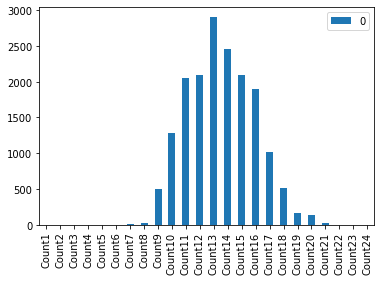

In [47]:
df.plot.bar()

Count1 to Count6 and Count22 to Count24 have 0 values. Count7 has value 1. We can drop these columns, because most of the data is concentrated between Count8 to Count21, that is from 7 AM to 9 PM.

In [48]:
## Dropping less important columns
data.drop(columns=['Count1','Count2','Count3','Count4','Count5','Count6','Count7','Count22','Count23','Count24'],inplace=True)

In [49]:
data

,Date,Count8,Count9,Count10,Count11,Count12,Count13,Count14,Count15,Count16,Count17,Count18,Count19,Count20,Count21
0,2010-12-01,0,3,12,9,11,20,12,7,11,9,4,0,0,0
1,2010-12-02,2,3,5,10,9,14,11,7,13,10,9,9,2,0
2,2010-12-03,0,0,5,6,4,9,6,9,6,3,2,0,0,0
3,2010-12-05,0,0,0,8,13,17,16,7,14,4,0,0,0,0
4,2010-12-06,0,2,4,11,12,19,13,8,12,2,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,2011-12-05,0,3,5,9,9,18,16,16,11,15,6,0,0,0
301,2011-12-06,0,4,6,9,17,25,10,14,8,6,6,0,0,0
302,2011-12-07,0,7,7,8,12,20,12,9,11,5,4,0,0,0
303,2011-12-08,0,1,9,7,12,19,14,7,14,6,5,7,5,1


Task-3: Assign Quarter for each data point.

In [57]:
data['Quarter']=[pd.to_datetime(date).quarter for date in data['Date']]

In [58]:
data

,Date,Count8,Count9,Count10,Count11,Count12,Count13,Count14,Count15,Count16,Count17,Count18,Count19,Count20,Count21,Quarter
0,2010-12-01,0,3,12,9,11,20,12,7,11,9,4,0,0,0,4
1,2010-12-02,2,3,5,10,9,14,11,7,13,10,9,9,2,0,4
2,2010-12-03,0,0,5,6,4,9,6,9,6,3,2,0,0,0,4
3,2010-12-05,0,0,0,8,13,17,16,7,14,4,0,0,0,0,4
4,2010-12-06,0,2,4,11,12,19,13,8,12,2,2,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,2011-12-05,0,3,5,9,9,18,16,16,11,15,6,0,0,0,4
301,2011-12-06,0,4,6,9,17,25,10,14,8,6,6,0,0,0,4
302,2011-12-07,0,7,7,8,12,20,12,9,11,5,4,0,0,0,4
303,2011-12-08,0,1,9,7,12,19,14,7,14,6,5,7,5,1,4


In [59]:
data.loc[data.Quarter==1]

,Date,Count8,Count9,Count10,Count11,Count12,Count13,Count14,Count15,Count16,Count17,Count18,Count19,Count20,Count21,Quarter
20,2011-01-04,0,0,0,6,5,5,7,6,5,1,0,0,0,0,1
21,2011-01-05,0,0,3,6,7,12,8,1,5,3,1,0,0,0,1
22,2011-01-06,0,1,3,4,5,7,3,5,6,5,4,3,0,0,1
23,2011-01-07,0,0,7,8,4,8,5,7,4,2,1,0,0,0,1
24,2011-01-09,0,0,0,5,12,9,4,9,7,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,2011-03-27,0,0,0,5,6,4,4,3,5,4,0,0,0,0,1
91,2011-03-28,1,1,5,5,6,10,5,11,6,3,0,0,0,0,1
92,2011-03-29,0,2,2,4,5,6,10,5,7,3,2,0,0,0,1
93,2011-03-30,0,0,8,7,7,12,11,6,7,4,1,0,0,0,1


In [60]:
data.loc[data.Quarter==2]

,Date,Count8,Count9,Count10,Count11,Count12,Count13,Count14,Count15,Count16,Count17,Count18,Count19,Count20,Count21,Quarter
95,2011-04-01,0,2,5,9,11,8,11,8,3,3,0,0,0,0,2
96,2011-04-03,0,0,0,3,6,3,1,2,3,0,0,0,0,0,2
97,2011-04-04,0,1,3,5,4,16,7,7,3,4,0,0,0,0,2
98,2011-04-05,0,3,3,10,5,7,5,2,6,3,1,0,0,0,2
99,2011-04-06,0,0,1,9,4,5,4,7,4,1,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,2011-06-26,0,0,0,1,6,3,7,4,3,1,0,0,0,0,2
163,2011-06-27,0,2,2,5,1,11,4,3,2,2,0,0,0,0,2
164,2011-06-28,0,3,1,6,6,3,7,6,7,1,2,0,0,0,2
165,2011-06-29,0,1,4,4,4,7,6,3,5,2,0,0,0,0,2


In [61]:
data.loc[data.Quarter==3]

,Date,Count8,Count9,Count10,Count11,Count12,Count13,Count14,Count15,Count16,Count17,Count18,Count19,Count20,Count21,Quarter
167,2011-07-01,0,3,3,4,3,8,7,3,4,0,1,0,0,0,3
168,2011-07-03,0,0,0,4,2,7,6,1,2,2,0,0,0,0,3
169,2011-07-04,0,0,0,3,4,7,6,2,7,3,0,0,0,0,3
170,2011-07-05,0,0,9,8,6,15,7,6,6,1,0,0,0,0,3
171,2011-07-06,0,0,3,11,8,11,8,6,6,5,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2011-09-26,1,1,3,8,6,12,11,9,8,3,2,0,0,0,3
241,2011-09-27,0,1,6,14,14,11,7,8,5,1,2,0,0,0,3
242,2011-09-28,0,1,4,10,6,14,10,11,12,7,0,0,0,0,3
243,2011-09-29,0,3,10,10,5,11,16,8,10,8,7,5,1,0,3


In [62]:
data.loc[data.Quarter==4]

,Date,Count8,Count9,Count10,Count11,Count12,Count13,Count14,Count15,Count16,Count17,Count18,Count19,Count20,Count21,Quarter
0,2010-12-01,0,3,12,9,11,20,12,7,11,9,4,0,0,0,4
1,2010-12-02,2,3,5,10,9,14,11,7,13,10,9,9,2,0,4
2,2010-12-03,0,0,5,6,4,9,6,9,6,3,2,0,0,0,4
3,2010-12-05,0,0,0,8,13,17,16,7,14,4,0,0,0,0,4
4,2010-12-06,0,2,4,11,12,19,13,8,12,2,2,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,2011-12-05,0,3,5,9,9,18,16,16,11,15,6,0,0,0,4
301,2011-12-06,0,4,6,9,17,25,10,14,8,6,6,0,0,0,4
302,2011-12-07,0,7,7,8,12,20,12,9,11,5,4,0,0,0,4
303,2011-12-08,0,1,9,7,12,19,14,7,14,6,5,7,5,1,4


Task-4: Boxplot for all hours from 7 AM to 9 PM for all Quarter

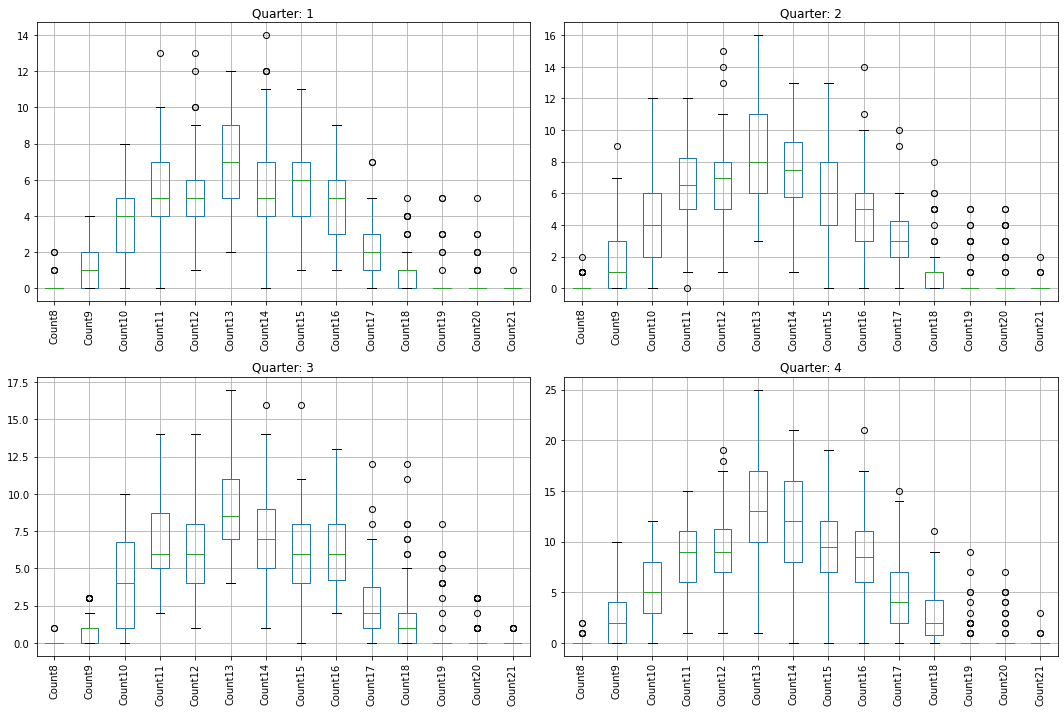

In [91]:
columns=['Count'+str(i) for i in range(8,22)]
plt.figure(figsize=(15,10))
for i in range(1,5):
  plt.subplot(2,2,i)
  plt.tight_layout()
  data.loc[data.Quarter==i].boxplot(column=columns,rot=90)
  plt.title('Quarter: '+ str(i))

Task-5: Plot moving average

In [92]:
data

,Date,Count8,Count9,Count10,Count11,Count12,Count13,Count14,Count15,Count16,Count17,Count18,Count19,Count20,Count21,Quarter
0,2010-12-01,0,3,12,9,11,20,12,7,11,9,4,0,0,0,4
1,2010-12-02,2,3,5,10,9,14,11,7,13,10,9,9,2,0,4
2,2010-12-03,0,0,5,6,4,9,6,9,6,3,2,0,0,0,4
3,2010-12-05,0,0,0,8,13,17,16,7,14,4,0,0,0,0,4
4,2010-12-06,0,2,4,11,12,19,13,8,12,2,2,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,2011-12-05,0,3,5,9,9,18,16,16,11,15,6,0,0,0,4
301,2011-12-06,0,4,6,9,17,25,10,14,8,6,6,0,0,0,4
302,2011-12-07,0,7,7,8,12,20,12,9,11,5,4,0,0,0,4
303,2011-12-08,0,1,9,7,12,19,14,7,14,6,5,7,5,1,4


In [96]:
data.rolling(14,axis=1).mean()

,Count8,Count9,Count10,Count11,Count12,Count13,Count14,Count15,Count16,Count17,Count18,Count19,Count20,Count21,Quarter
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,7.285714
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.428571,7.571429
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.571429,3.857143
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.642857,5.928571
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.071429,6.357143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.714286,8.000000
301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.500000,7.785714
302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.785714,7.071429
303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.642857,7.928571
